In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import matplotlib as mpl
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, u_darrays as uda, u_arrays as ua
from utils import u_statistics as u_stats
import datetime
import matplotlib.colors as mcolors
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from utils import u_plot as uplot
import salem
import numpy.ma as ma
from scipy import stats, ndimage
import warnings
from scipy.ndimage.measurements import label
import shapely.geometry as shpg
import datetime
from scipy.stats import gaussian_kde, linregress
import datetime

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
def get_monthly_anomalies(df):
    return df.groupby(df.index.month).transform(lambda x: x-x.mean())

In [4]:
# import glob
# import ipdb
# import os

# fname = '/home/ck/DIR/cornkle/data/HUARAZ/shapes/riosan_sel_one.shp'
# sdf = salem.read_shapefile(fname)
# sdf = salem.transform_geopandas(sdf, to_crs=salem.wgs84)

# outp = '/home/ck/rio_santa/'

# ds_list = []
# disk_path = cnst.elements_drive + 'global/AMSR2/daily/10km/day/nc/AMSR2_*.nc'
# for f in glob.glob(disk_path):
#     print('Doing', f)

#     ds = xr.open_dataset(f)
#     ds = ds.sel(lat=slice(-10.5,-8.5), lon=slice(-78.3, -76.3)).load()
#     #ipdb.set_trace()
#     dsout = ds.salem.roi(shape=sdf)
    
# #     comp = dict(zlib=True, complevel=5)
# #     encoding = {var: comp for var in dsout.data_vars}
    
# #     dsout.to_netcdf(outp+fbase, mode='w', encoding=encoding, format='NETCDF4')
#     ds_list.append(dsout)
#     del ds

Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20120703.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20120704.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20120705.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20120706.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20120707.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20120708.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20120709.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20120710.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20120711.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20120712.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20120713.nc

Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20120926.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20120927.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20120928.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20120929.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20120930.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20121001.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20121002.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20121003.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20121004.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20121005.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20121006.nc

Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130102.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130103.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130104.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130105.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130106.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130107.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130108.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130109.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130110.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130111.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130112.nc

Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130410.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130411.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130412.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130413.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130414.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130415.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130416.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130417.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130418.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130419.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130420.nc

Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130128.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130211.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130225.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130311.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130325.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130408.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130422.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130506.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130523.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130606.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130620.nc

Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20131013.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20131014.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20131015.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20131016.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20131017.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20131018.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20131019.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20131020.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20131021.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20131022.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20131023.nc

Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130815.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130829.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130912.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20130926.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20131010.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20131024.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20131107.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20131121.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20131205.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20131219.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20140117.nc

Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20140414.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20140415.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20140416.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20140417.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20140418.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20140419.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20140420.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20140421.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20140422.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20140423.nc
Doing /media/ck/Elements/global/AMSR2/daily/10km/day/nc/AMSR2_L3_SOILM3_V001_A_20140425.nc

KeyboardInterrupt: 

In [ ]:
# full = xr.concat(ds_list,dim='time')
# tfull = full.sortby('time')

In [5]:
# comp = dict(zlib=True, complevel=5)
# encoding = {var: comp for var in tfull.data_vars}
    

# tfull.to_netcdf('/home/ck/DIR/cornkle/data/HUARAZ/Lorenz_NDVI/AMSR2/AMSR2_daytime_10km_RioSanta_2012-2021.nc', mode='w', encoding=encoding, format='NETCDF4')

In [110]:
tfull = xr.open_dataset('/home/ck/DIR/cornkle/data/HUARAZ/Lorenz_NDVI/AMSR2/AMSR2_daytime_10km_RioSanta_2012-2021.nc')

In [7]:
smask = tfull['soil_moisture_c1'].mean('time') < 50

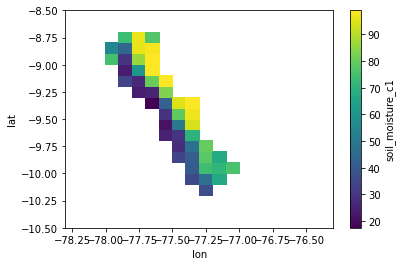

In [8]:
tfull['soil_moisture_c1'].mean('time').plot() #where(smask)

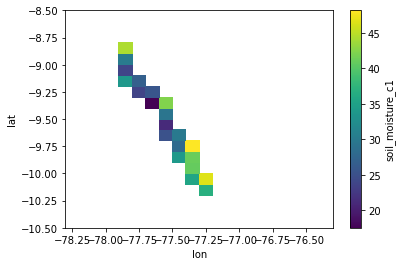

In [9]:
tfull['soil_moisture_c1'].where(smask).mean('time').plot() #where(smask)

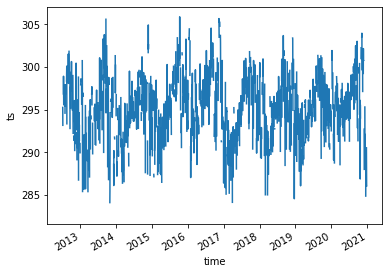

In [37]:
tfull['ts'].where(smask).mean(['lat', 'lon']).sel(time=((tfull['time.year']>=2012)&(tfull['time.year']<=2020))).plot()

In [148]:
def get_dataframe_anomaly(tf, var):
    ttrust = tf[var]
    anom = ttrust.where(smask).mean(['lat', 'lon'])
    anom = anom.resample(time='1M', label='left', closed='right').mean().to_dataframe()   #.where(anom<=60) resample(time='1M', label='left', closed='right').mean()
    anom = anom.groupby(anom.index.month).transform(lambda x: x-x.mean())
    return anom

In [149]:
anom = get_dataframe_anomaly(tfull, 'ts')
smano = get_dataframe_anomaly(tfull, 'soil_moisture_c1')

In [150]:
anom.index = anom.index + pd.Timedelta('1 days')
smano.index = smano.index + pd.Timedelta('1 days')

In [151]:
dfd = pd.read_csv('/home/ck/DIR/cornkle/data/HUARAZ/Lorenz_NDVI/monthly_ndvi_chirps.csv',index_col=0,parse_dates=True)

In [152]:
from scipy import signal
dfd['NDVI_detr'] = signal.detrend(dfd['NDVI'])
dfd['prec_detr'] = signal.detrend(dfd['precipitation'])

In [153]:
precip = get_monthly_anomalies(dfd['prec_detr'])
ndvi = get_monthly_anomalies(dfd['NDVI_detr'].shift(-1))

In [159]:
df = precip.to_frame()

In [160]:
df = df.join(ndvi.to_frame())

In [161]:
df = df.join(anom).dropna()

In [162]:
df = df.join(smano).dropna()

In [165]:
df.corr()**2

,prec_detr,NDVI_detr,ts,soil_moisture_c1
prec_detr,1.000000,0.051305,0.130055,0.060542
NDVI_detr,0.051305,1.000000,0.283778,0.113176
ts,0.130055,0.283778,1.000000,0.384933
soil_moisture_c1,0.060542,0.113176,0.384933,1.000000


In [ ]:
chirps_doypick.sel(time=(chirps_doypick['time.year']>=2000)&(chirps_doypick['time.dayofyear']<=121)&(chirps_doypick['time.dayofyear']>=121-80), latitude=-9.5, longitude=-77.5, method='nearest').groupby('time.year').mean().plot()

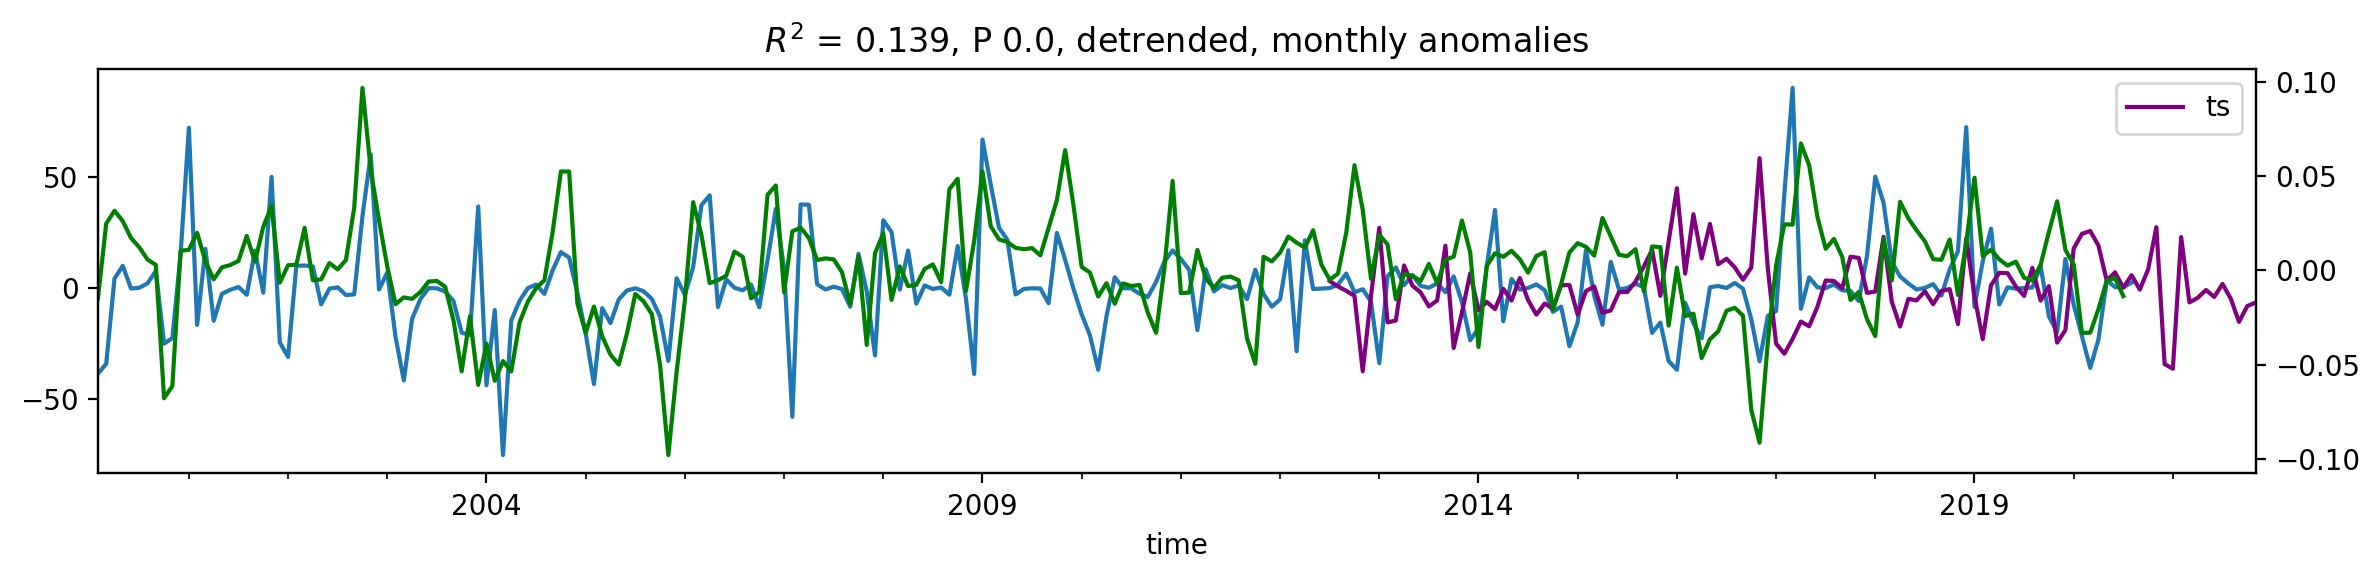

In [89]:
import scipy
fig,ax = plt.subplots(figsize=(12,3), dpi=200)
ay = ax.twinx()

precip.plot(ax=ax)
ndvi.plot(ax=ay,c='g')
(anom*10).plot(ax=ax, c='purple')
#wanom.plot(ax=ax, c='red')

r, p = scipy.stats.pearsonr(ndvi.iloc[:-1], precip.iloc[:-1])

ax.set_title(f"$R^2$ = {np.round(r**2,3)}, P {np.round(p,5)}, detrended, monthly anomalies")



fig.tight_layout()

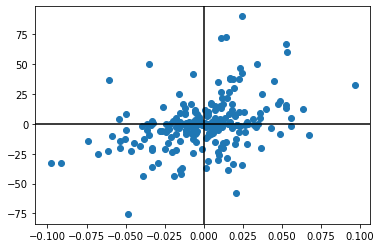

In [467]:
f = plt.figure()
ax = f.add_subplot(111)
ax.scatter(ndvi.iloc[:-1], precip.iloc[:-1])
ax.axhline(0, color='k')
ax.axvline(0, color='k')

In [498]:
df = precip.to_frame('prcp')

In [499]:
df2 = ndvi.to_frame('ndvi')

In [500]:
df = df.join(df2)

In [501]:
df = df.join(anom).dropna()

In [502]:
df = df.join(wanom).dropna()

In [503]:
df['PRCP'] = signal.detrend(df['PRCP'])

In [504]:
df['soil_moisture_c1'] = signal.detrend(df['soil_moisture_c1'])

In [505]:
df.corr(method='pearson')

,prcp,ndvi,soil_moisture_c1,PRCP
prcp,1.000000,0.217842,0.292422,0.304576
ndvi,0.217842,1.000000,0.443113,0.267770
soil_moisture_c1,0.292422,0.443113,1.000000,0.497029
PRCP,0.304576,0.267770,0.497029,1.000000


In [437]:
wrf_precip = xr.open_dataset('/home/ck/rio_santa/timeseries/wrfout_fullTS_fullValley_snowmask_d02.nc')

In [438]:
wprcp = wrf_precip['PRCP'].resample(time='1M', label='right').sum()

In [439]:
wprcp.time

<xarray.DataArray 'time' (time: 489)>
array(['1980-01-31T00:00:00.000000000', '1980-02-29T00:00:00.000000000',
       '1980-03-31T00:00:00.000000000', ..., '2020-07-31T00:00:00.000000000',
       '2020-08-31T00:00:00.000000000', '2020-09-30T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1980-01-31 1980-02-29 ... 2020-09-30

In [440]:
wprcp = wprcp.loc["2000-01-01":"2021-03-01"].to_dataframe()

In [441]:
wprcp

,PRCP
time,
2000-01-31,258.134460
2000-02-29,332.590027
2000-03-31,337.820679
2000-04-30,140.736938
2000-05-31,78.190689
...,...
2020-05-31,69.999466
2020-06-30,3.937215
2020-07-31,3.547178


In [442]:
wanom = wprcp.groupby(wprcp.index.month).transform(lambda x: x-x.mean())

In [443]:
nind = []
for wi in wanom.index:
    nind.append(wi.replace(day=1))

In [444]:
wanom.index = pd.DatetimeIndex(nind)

In [445]:
wanom.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', length=249, freq=None)